<img style="float:left" width="70%" src="pics/escudo_COLOR_1L_DCHA.png">
<img style="float:right" width="15%" src="pics/PythonLogo.svg">
<br style="clear:both;">

# Minería de datos

<h2 style="display: inline-block; padding: 4mm; padding-left: 2em; background-color: navy; line-height: 1.3em; color: white; border-radius: 10px;">Práctica Pandas</h2>

## Docentes

 - José Francisco Diez Pastor
 
## Estudiantes (1-2)

- Estudiante 1 
- Estudiante 2

## Descripción de la práctica

En esta práctica se va a utilizar pandas para realizar, mayoritariamente, las tareas de procesamiento de datos realizadas en la práctica de KNIME.




<a id="index"></a>
## Tareas 

1. [Carga de los datos. **(1 Puntos)**](#1)
2. [Creación de atributos de número de interacciones **(1 Puntos)**](#2)
3. [Combinación de los DataFrames **(1 Puntos)**](#3)
4. [Creación de la clase **(1 Puntos)**](#4)
5. [Imputación de desconocidos **(1 Puntos)**](#5)
6. [Transformación de atributos nominales a numéricos **(1 Puntos)**](#6)
7. [Elimina los atributos irrelevantes **(1 Puntos)**](#7)
8. [Calculo de la correlación con la clase **(1 Puntos)**](#8)



###  Tarea 1. Carga de los datos (1 Puntos)<a id="1"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>


1. Utilizar la función `read_csv` para obtener varios DataFrames a partir de los ficheros `.csv`.

2. Adicionalmente se filtrarán atributos en el DataFrame correspondiente con los datos de los pacientes para quedarnos únicamente con id, deadthdate, marital, race, ethnicity, gender, healthcare_expenses, healthcare_coverage.



In [5]:
import pandas as pd

In [20]:
# Completa

def cargar_csv():

    procedures_df = pd.read_csv("/home/conflictor/Escritorio/UNI/UBU/Mineria-de-Datos/Practicas/P3/2024_PD_Survival/data/procedures.csv")
    patients_df = pd.read_csv("/home/conflictor/Escritorio/UNI/UBU/Mineria-de-Datos/Practicas/P3/2024_PD_Survival/data/patients.csv")
    observations_df = pd.read_csv("/home/conflictor/Escritorio/UNI/UBU/Mineria-de-Datos/Practicas/P3/2024_PD_Survival/data/observations.csv")
    encounters_df = pd.read_csv("/home/conflictor/Escritorio/UNI/UBU/Mineria-de-Datos/Practicas/P3/2024_PD_Survival/data/encounters.csv")
    conditions_df = pd.read_csv("/home/conflictor/Escritorio/UNI/UBU/Mineria-de-Datos/Practicas/P3/2024_PD_Survival/data/conditions.csv")

    patients_df = patients_df[['Id', 'DEATHDATE', 'MARITAL', 'RACE', 'ETHNICITY', 'GENDER', 'HEALTHCARE_EXPENSES', 'HEALTHCARE_COVERAGE']]
    
    return procedures_df, patients_df, observations_df, encounters_df, conditions_df


In [21]:
procedures_df, patients_df, observations_df, encounters_df, conditions_df = cargar_csv()


### Tarea 2. Creación de atributos de número de interacciones **(1 Puntos)**<a id="2"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>

Creación, mediante el uso del método `groupBy` de pandas, de los atributos `numProcedures`, `numEncounters`, `numConditions` y `numObservations`

Inicialmente en DataFrames separados, para fusionarlos en el ejercicio siguiente.

Ejemplo de como quedan los 3 primeros DataFrames:

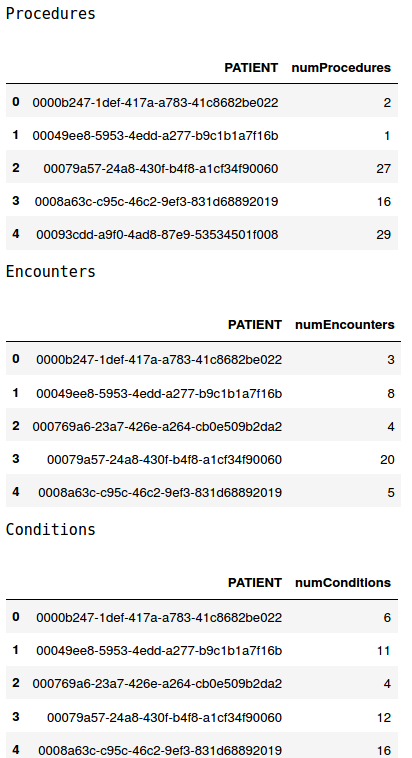

In [22]:
# Crear atributo numProcedures
numProcedures_df = procedures_df.groupby('PATIENT').size().reset_index(name='numProcedures')

# Crear atributo numEncounters
numEncounters_df = encounters_df.groupby('PATIENT').size().reset_index(name='numEncounters')

# Crear atributo numConditions
numConditions_df = conditions_df.groupby('PATIENT').size().reset_index(name='numConditions')

# Crear atributo numObservations
numObservations_df = observations_df.groupby('PATIENT').size().reset_index(name='numObservations')



print("Procedures")
display(numProcedures_df.head())

print("Encounters")
display(numEncounters_df.head())

print("Conditions")
display(numConditions_df.head())

print("Observations")
display(numObservations_df.head())

Procedures


,PATIENT,numProcedures
0,0000b247-1def-417a-a783-41c8682be022,2
1,00049ee8-5953-4edd-a277-b9c1b1a7f16b,1
2,00079a57-24a8-430f-b4f8-a1cf34f90060,27
3,0008a63c-c95c-46c2-9ef3-831d68892019,16
4,00093cdd-a9f0-4ad8-87e9-53534501f008,29


Encounters


,PATIENT,numEncounters
0,0000b247-1def-417a-a783-41c8682be022,3
1,00049ee8-5953-4edd-a277-b9c1b1a7f16b,8
2,000769a6-23a7-426e-a264-cb0e509b2da2,4
3,00079a57-24a8-430f-b4f8-a1cf34f90060,20
4,0008a63c-c95c-46c2-9ef3-831d68892019,5


Conditions


,PATIENT,numConditions
0,0000b247-1def-417a-a783-41c8682be022,6
1,00049ee8-5953-4edd-a277-b9c1b1a7f16b,11
2,000769a6-23a7-426e-a264-cb0e509b2da2,4
3,00079a57-24a8-430f-b4f8-a1cf34f90060,12
4,0008a63c-c95c-46c2-9ef3-831d68892019,16


Observations


,PATIENT,numObservations
0,0000b247-1def-417a-a783-41c8682be022,30
1,00049ee8-5953-4edd-a277-b9c1b1a7f16b,13
2,000769a6-23a7-426e-a264-cb0e509b2da2,13
3,00079a57-24a8-430f-b4f8-a1cf34f90060,682
4,0008a63c-c95c-46c2-9ef3-831d68892019,386


### Tarea 3. Combinación de los DataFrames **(1 Puntos)**<a id="3"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>

Usa `merge` o cualquier otra forma que te resulte más fácil.

El DataFrame fusionado se llama `df_all`

```Python
display(df_all.head())
```

<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Id</th>\n      <th>DEATHDATE</th>\n      <th>MARITAL</th>\n      <th>RACE</th>\n      <th>ETHNICITY</th>\n      <th>GENDER</th>\n      <th>HEALTHCARE_EXPENSES</th>\n      <th>HEALTHCARE_COVERAGE</th>\n      <th>numProcedures</th>\n      <th>numEncounters</th>\n      <th>numConditions</th>\n      <th>numObservations</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>f0f3bc8d-ef38-49ce-a2bd-dfdda982b271</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>white</td>\n      <td>nonhispanic</td>\n      <td>M</td>\n      <td>8446.49</td>\n      <td>1499.08</td>\n      <td>2</td>\n      <td>5</td>\n      <td>5</td>\n      <td>42</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>067318a4-db8f-447f-8b6e-f2f61e9baaa5</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>white</td>\n      <td>nonhispanic</td>\n      <td>F</td>\n      <td>89893.40</td>\n      <td>1845.72</td>\n      <td>3</td>\n      <td>5</td>\n      <td>8</td>\n      <td>45</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>ae9efba3-ddc4-43f9-a781-f72019388548</td>\n      <td>NaN</td>\n      <td>S</td>\n      <td>white</td>\n      <td>nonhispanic</td>\n      <td>M</td>\n      <td>577445.86</td>\n      <td>3528.84</td>\n      <td>1</td>\n      <td>13</td>\n      <td>11</td>\n      <td>29</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>199c586f-af16-4091-9998-ee4cfc02ee7a</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>white</td>\n      <td>nonhispanic</td>\n      <td>F</td>\n      <td>336701.72</td>\n      <td>2705.64</td>\n      <td>2</td>\n      <td>3</td>\n      <td>7</td>\n      <td>44</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>353016ea-a0ff-4154-85bb-1cf8b6cedf20</td>\n      <td>NaN</td>\n      <td>NaN</td>\n      <td>white</td>\n      <td>nonhispanic</td>\n      <td>M</td>\n      <td>484076.34</td>\n      <td>3043.04</td>\n      <td>1</td>\n      <td>1</td>\n      <td>7</td>\n      <td>13</td>\n    </tr>\n  </tbody>\n</table>


In [23]:
# Fusionar los DataFrames usando merge
df_all = pd.merge(numProcedures_df, numEncounters_df, on='PATIENT', how='inner')
df_all = pd.merge(df_all, numConditions_df, on='PATIENT', how='inner')
df_all = pd.merge(df_all, numObservations_df, on='PATIENT', how='inner')
df_all = pd.merge(patients_df, df_all, left_on='Id', right_on='PATIENT', how='inner')

# Mostrar los primeros registros del DataFrame fusionado
display(df_all.head())



,Id,DEATHDATE,MARITAL,RACE,ETHNICITY,GENDER,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,PATIENT,numProcedures,numEncounters,numConditions,numObservations
0,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,NaN,NaN,white,nonhispanic,M,8446.49,1499.08,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,2,5,5,42
1,067318a4-db8f-447f-8b6e-f2f61e9baaa5,NaN,NaN,white,nonhispanic,F,89893.40,1845.72,067318a4-db8f-447f-8b6e-f2f61e9baaa5,3,5,8,45
2,ae9efba3-ddc4-43f9-a781-f72019388548,NaN,S,white,nonhispanic,M,577445.86,3528.84,ae9efba3-ddc4-43f9-a781-f72019388548,1,13,11,29
3,199c586f-af16-4091-9998-ee4cfc02ee7a,NaN,NaN,white,nonhispanic,F,336701.72,2705.64,199c586f-af16-4091-9998-ee4cfc02ee7a,2,3,7,44
4,353016ea-a0ff-4154-85bb-1cf8b6cedf20,NaN,NaN,white,nonhispanic,M,484076.34,3043.04,353016ea-a0ff-4154-85bb-1cf8b6cedf20,1,1,7,13


### Tarea 4. Creación de la clase **(1 Puntos)**<a id="4"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>

De forma equivalente al enunciado en KNIME vamos crear un atributo `Classs`, resultante de procesar el atributo `DEATHDATE`. En la clase las fechas serán substituidas 1s y los nulos por 0s.

Puedes utilizar las funciones `fillna` y `replace`.


Explorando el número de valores de cada tipo.
```Python
df_all["Class"].value_counts()
```

```
Class
0    9422
1    2142
Name: count, dtype: int64

```

In [24]:
# Reemplazar fechas por 1s y valores nulos por 0s en la columna DEATHDATE
df_all['Class'] = df_all['DEATHDATE'].apply(lambda x: 0 if pd.isnull(x) else 1)

# Convertir la columna Class a tipo de dato entero
df_all['Class'] = df_all['Class'].astype(int)

df_all["Class"].value_counts()

0    9422
1    2142
Name: Class, dtype: int64

### Tarea 5. Imputación de desconocidos **(1 Puntos)**<a id="5"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>

Si obtenemos el número de nulos `isnull()` y después los contamos `sum()` vemos que tenemos nulos en los atributos:
- `DEATHDATE`. No nos importa, ya hemos generado el atributo `Class` y `DEATHDATE` lo eliminaremos.
- `MARITAL`. En este caso, se quiere sustituir los misings por el valor más frecuente de la columna.
    - El valor más frecuente puede obtenerse con el método `mode()`. Investiga como usar el método `fillna()` para substituir los nulos con la moda.
    
    
Antes de la imputación
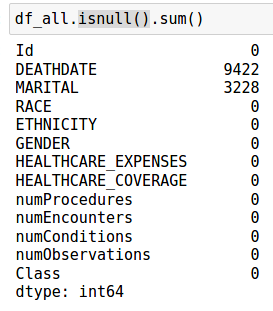

Después de la imputación
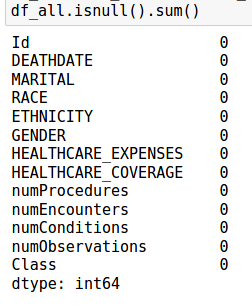


In [25]:
# Completa
df_all.isnull().sum()

Id                        0
DEATHDATE              9422
MARITAL                3228
RACE                      0
ETHNICITY                 0
GENDER                    0
HEALTHCARE_EXPENSES       0
HEALTHCARE_COVERAGE       0
PATIENT                   0
numProcedures             0
numEncounters             0
numConditions             0
numObservations           0
Class                     0
dtype: int64

In [26]:
# Eliminar la columna DEATHDATE
df_all.drop(columns=['DEATHDATE'], inplace=True)

# Calcular el valor más frecuente (moda) en la columna MARITAL
moda_marital = df_all['MARITAL'].mode()[0]  # El [0] es para obtener el valor único de la moda en caso de que haya más de uno

# Reemplazar los valores faltantes en la columna MARITAL con la moda
df_all['MARITAL'].fillna(moda_marital, inplace=True)

In [27]:
df_all.head()

,Id,MARITAL,RACE,ETHNICITY,GENDER,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,PATIENT,numProcedures,numEncounters,numConditions,numObservations,Class
0,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,M,white,nonhispanic,M,8446.49,1499.08,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,2,5,5,42,0
1,067318a4-db8f-447f-8b6e-f2f61e9baaa5,M,white,nonhispanic,F,89893.40,1845.72,067318a4-db8f-447f-8b6e-f2f61e9baaa5,3,5,8,45,0
2,ae9efba3-ddc4-43f9-a781-f72019388548,S,white,nonhispanic,M,577445.86,3528.84,ae9efba3-ddc4-43f9-a781-f72019388548,1,13,11,29,0
3,199c586f-af16-4091-9998-ee4cfc02ee7a,M,white,nonhispanic,F,336701.72,2705.64,199c586f-af16-4091-9998-ee4cfc02ee7a,2,3,7,44,0
4,353016ea-a0ff-4154-85bb-1cf8b6cedf20,M,white,nonhispanic,M,484076.34,3043.04,353016ea-a0ff-4154-85bb-1cf8b6cedf20,1,1,7,13,0


### Tarea 6. Transformación de atributos nominales a numéricos **(1 Puntos)**<a id="6"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>

Tenemos 4 atributos nominales que queremos convertir a binarios: `MARITAL`,`RACE`,`ETHNICITY`,`GENDER`.

Usa el método `get_dummies()` para generar los atributos binarios.



In [31]:
# Completa
# Convertir atributos nominales a binarios usando get_dummies
df_all = pd.get_dummies(df_all, columns=['MARITAL', 'RACE', 'ETHNICITY', 'GENDER'])


# Eliminar las columnas redundantes
columnas_a_eliminar = ['MARITAL_S', 'RACE_other', 'ETHNICITY_nonhispanic', 'GENDER_M']
df_all.drop(columns=columnas_a_eliminar, inplace=True)



In [32]:
df_all.head()

,Id,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,PATIENT,numProcedures,numEncounters,numConditions,numObservations,Class,MARITAL_M,RACE_asian,RACE_black,RACE_native,RACE_white,ETHNICITY_hispanic,GENDER_F
0,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,8446.49,1499.08,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,2,5,5,42,0,1,0,0,0,1,0,0
1,067318a4-db8f-447f-8b6e-f2f61e9baaa5,89893.40,1845.72,067318a4-db8f-447f-8b6e-f2f61e9baaa5,3,5,8,45,0,1,0,0,0,1,0,1
2,ae9efba3-ddc4-43f9-a781-f72019388548,577445.86,3528.84,ae9efba3-ddc4-43f9-a781-f72019388548,1,13,11,29,0,0,0,0,0,1,0,0
3,199c586f-af16-4091-9998-ee4cfc02ee7a,336701.72,2705.64,199c586f-af16-4091-9998-ee4cfc02ee7a,2,3,7,44,0,1,0,0,0,1,0,1
4,353016ea-a0ff-4154-85bb-1cf8b6cedf20,484076.34,3043.04,353016ea-a0ff-4154-85bb-1cf8b6cedf20,1,1,7,13,0,1,0,0,0,1,0,0


### Tarea 7. Elimina los atributos irrelevantes **(1 Puntos)**<a id="7"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>

Crea el DataFrame `df_final` eliminando los atributos que ahora son irrelevantes:
- Id. Solo lo necesitabamos para hacer el `join`.
- DEATHDATE. Ahora tenemos `Class`.
- MARITAL_S,ETHNICITY_nonhispanic,GENDER_M. Marital, Enthinicy y Gender, son nominales con dos valores diferentes, al aplicar get_dummies producen 2 atributos pseudoduplicados (intercambiando 1s y 0s), Se puede eliminar uno de ellos.


```Python
display(df_final)
```

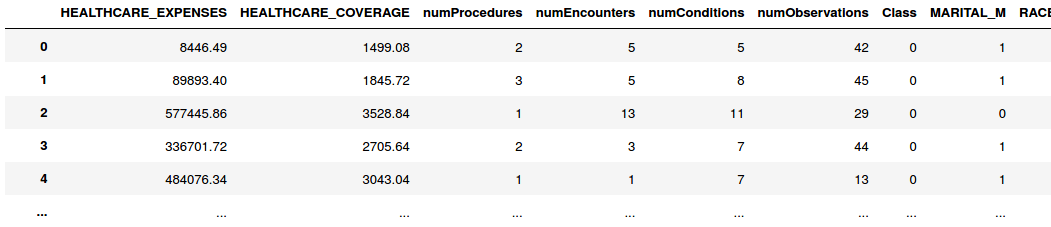

In [ ]:
# completa
df_all.drop(columns=['Id'], inplace=True)

### Tarea 8. Calculo de la correlación con la clase **(1 Puntos)**<a id="8"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>

- Obten la correlación entre la clase y cada uno de los atributos.
- Ordena los atributos de mayor a menor correlación.

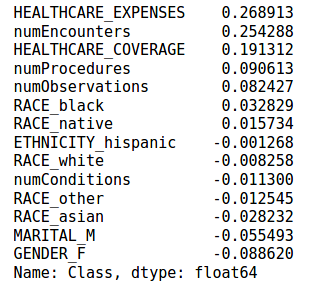

In [34]:
# completa
# Calcular la correlación entre la clase y cada atributo
correlaciones = df_all.corr(numeric_only=True)['Class'].sort_values(ascending=False)

# Mostrar las correlaciones ordenadas de mayor a menor
print(correlaciones)

Class                  1.000000
HEALTHCARE_EXPENSES    0.268913
numEncounters          0.254288
HEALTHCARE_COVERAGE    0.191312
numProcedures          0.090613
numObservations        0.082427
RACE_black             0.032829
RACE_native            0.015734
ETHNICITY_hispanic    -0.001268
RACE_white            -0.008258
numConditions         -0.011300
RACE_asian            -0.028232
MARITAL_M             -0.055493
GENDER_F              -0.088620
Name: Class, dtype: float64


### Tarea 9. Crea tabla de frecuencias **(1 Puntos)**<a id="9"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>

Crea una tabla de frecuencias de mortalidad en función del sexo.

Investiga el uso de la función `crosstab`.

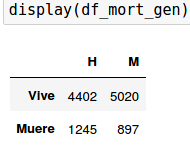

In [43]:
# Filtrar el DataFrame para incluir solo filas con 'Hombre' o 'Mujer'
df_gender = df_all[df_all['GENDER_F'].map({0: 'Hombre', 1: 'Mujer'}).isin(['Hombre', 'Mujer'])]

# Crear tabla de frecuencias de mortalidad en función del sexo
tabla_frecuencias = pd.crosstab(index=df_gender['GENDER_F'].map({0: 'Hombre', 1: 'Mujer'}), 
                                columns=df_gender['Class'].map({0: 'Vive', 1: 'Muere'}),
                                margins=True, 
                                margins_name='Total')

# Mostrar la tabla de frecuencias como un DataFrame
df_tabla_frecuencias = pd.DataFrame(tabla_frecuencias)
df_tabla_frecuencias.index.name = 'Gender'
df_tabla_frecuencias.columns.name = 'Mortalidad'

# Mostrar el DataFrame de la tabla de frecuencias
print(df_tabla_frecuencias)


Mortalidad  Muere  Vive  Total
Gender                        
Hombre       1245  4402   5647
Mujer         897  5020   5917
Total        2142  9422  11564


### Tarea 10. Crea un gráfico de dispersión **(1 Puntos)**<a id="10"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>


Crea un gráfico de dispersión que enfrente HEALTHCARE_EXPENSES, HEALTHCARE_COVERAGE y que coloree los puntos usando la clase.

El resultado puede ser similar a este:

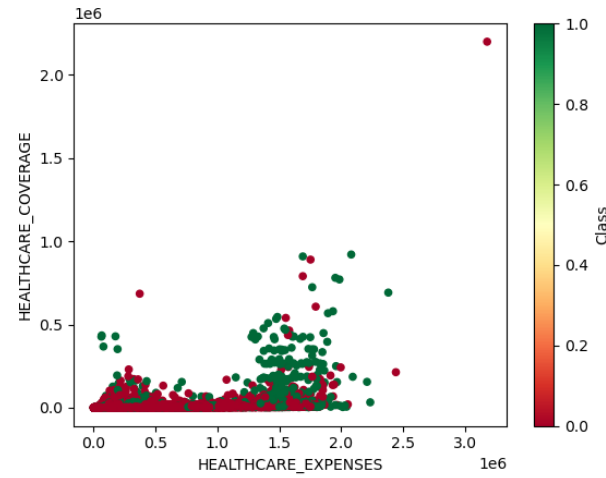

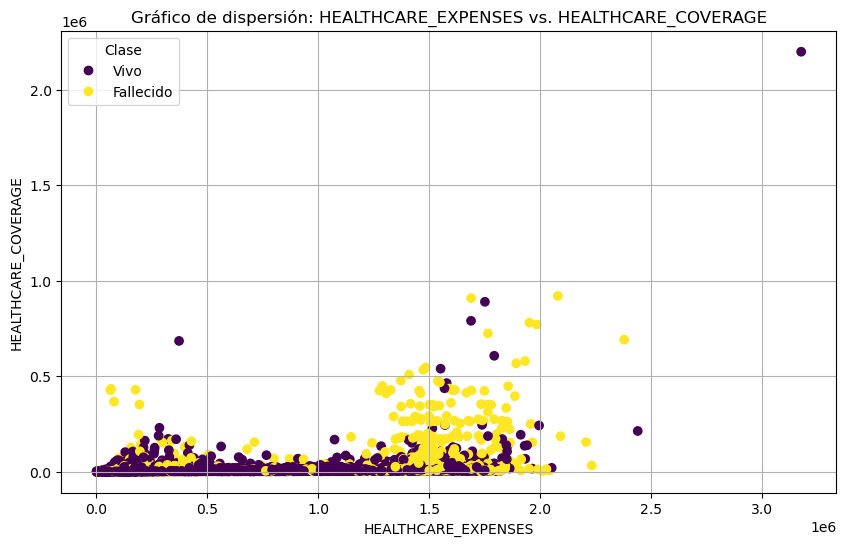

In [44]:
# completa 
import matplotlib.pyplot as plt

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_all['HEALTHCARE_EXPENSES'], df_all['HEALTHCARE_COVERAGE'], c=df_all['Class'], cmap='viridis')

# Agregar etiquetas y título
plt.xlabel('HEALTHCARE_EXPENSES')
plt.ylabel('HEALTHCARE_COVERAGE')
plt.title('Gráfico de dispersión: HEALTHCARE_EXPENSES vs. HEALTHCARE_COVERAGE')

# Agregar una leyenda
plt.legend(handles=scatter.legend_elements()[0], labels=['Vivo', 'Fallecido'], title='Clase')

# Mostrar el gráfico
plt.grid(True)
plt.show()
